In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [2]:
def f1(x):
    A1 = np.array([[0.4, -0.3733], [0.06, 0.6]])
    b1 = np.array([0.3533, 0.0])
    return A1@x + b1

def f2(x):
    A2 = np.array([[-0.8, -0.1867], [0.1371, 0.8]])
    b2 = np.array([1.1, 0.1])
    return A2@x + b2

In [3]:
w = [0.2993, 0.7007]
n = 10000

x = np.zeros((2, n+1))

for i in range(1, n+1):
    u = np.random.uniform()
    if u <= w[0]:
        x[:, i] = f1(x[:, i-1])
    else:
        x[:, i] = f2(x[:, i-1])

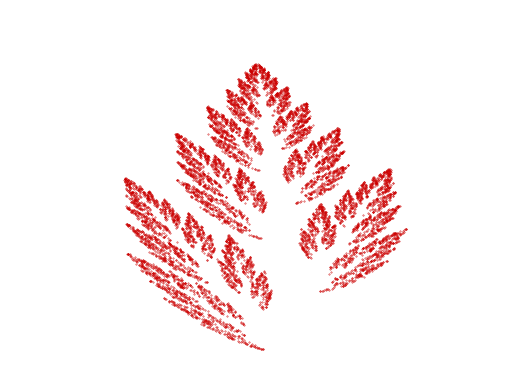

In [4]:
plt.scatter(x[0, 20:n], x[1, 20:n], s=0.1, color = [0.8, 0, 0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible (False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_xlim(0, 1.05)
plt.gca().set_ylim(0, 1)
plt.show()

# Q2
### 2.1 Simulate a Gaussian time-series corrupted by noise

By the setting of this question, the value of $x$ decrease gradually with a rate 0.9. Therefore it is reasonable to see a exponentially decreasing trend in the figure below. This can be treated as a model of temperature change of $1^{\circ}$ C water in a fridge with degree $0^{\circ}$ C, where $x$ represents the exact temperature of water and $y$ represents the observed temperature by a sensor. At first the temperature will decrease fast since there is a relatively huge difference with fridge temperature. When the temporature of a water get close to the fridge temperature, it will take more time to decrease. Since the fridge setting like cooling and wind systems would affect the temporature of water, it is reasonable to have a normal distribution to simulate next $x$. Since $y$ is the observed value, there would be noise due to the device. Therefore, it is reasonable to use normal distribution to simulate $y$. Other examples like decreasing stock exchange and electricity with direction would also be valid.

In [5]:
a = 0.9
sigma_x = 0.01
sigma_y = 0.1
T = 100
x_arr = [1.0]
y_arr = [np.random.normal(1.0, sigma_y)]

In [6]:
for i in range(T):
    x = np.random.normal(a*x_arr[-1], sigma_x)
    x_arr.append(x)
    y_arr.append(np.random.normal(x, sigma_y))

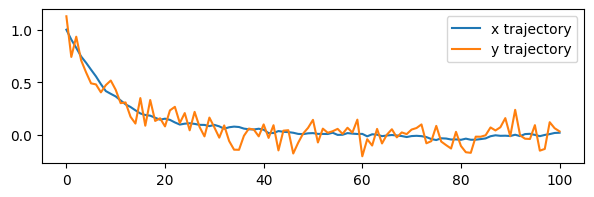

In [7]:
plt.figure(figsize=(7, 2))
plt.plot(np.arange(0, 101), x_arr)
plt.plot(np.arange(0, 101), y_arr)
plt.legend(['x trajectory', 'y trajectory'])

### 2.2 Develop a stochastic volatility model and simulate
##### Plot for an increasing trend

Here we simulate data from the following model
\begin{align}
    x_t|x_{t-1}&\sim \mathcal N(x_t;, 1.002x_{t-1}, 0.001^2)\\
    y_t|x_t &\sim \mathcal N(y_t; 0, (x_t^2)^2)
\end{align}
by starting from $x_0=2$. In this case, volatility has an increasing trend. The obsearved returns follow a normal distribution with mean $0$ and standard deviation $x_t^2$, which means the returns are quite sensitive to volatility.

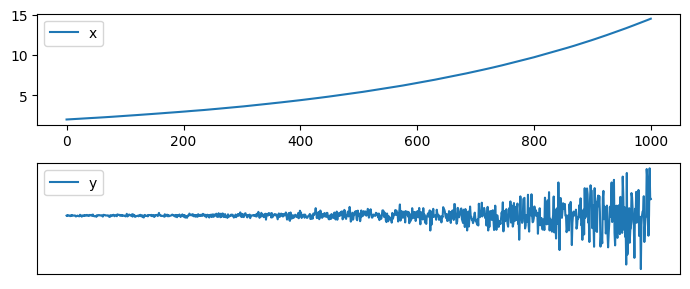

In [8]:
n = 1000
x_arr = [2]
y_arr = [np.random.normal(0, 2**2)]

for i in range(n):
    x_last = x_arr[-1]
    x = np.random.normal(1.002*x_last, 0.001)
    x_arr.append(x)
    y = np.random.normal(0, x**2)
    y_arr.append(y)

plt.figure(figsize=(7, 3))
plt.subplot(2, 1, 1)
plt.plot(x_arr, label='x')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_arr, label='y')
plt.legend()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()

##### Plot for an decreasing trend

Here we simulate data from the following model
\begin{align}
    x_t|x_{t-1}&\sim \mathcal N(x_t;, 0.998x_{t-1}, 0.001^2)\\
    y_t|x_t &\sim \mathcal N(y_t; 0, (x_t^2)^2)
\end{align}
by starting from $x_0=15$. In this case, volatility has an increasing trend. The obsearved returns follow a normal distribution with mean $0$ and standard deviation $x_t^2$, which means the returns are quite sensitive to volatility.

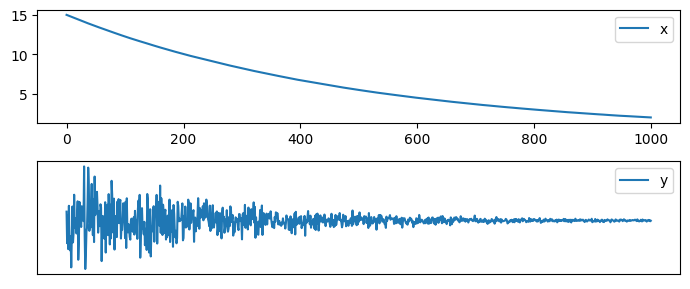

In [9]:
n = 1000
x_arr = [15]
y_arr = [np.random.normal(0, 15**2)]

for i in range(n):
    x_last = x_arr[-1]
    x = np.random.normal(0.998*x_last, 0.001)
    x_arr.append(x)
    y = np.random.normal(0, x**2)
    y_arr.append(y)

plt.figure(figsize=(7, 3))
plt.subplot(2, 1, 1)
plt.plot(x_arr, label='x')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_arr, label='y')
plt.legend()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()

##### Plot for generating realistic data

Here we simulate data from the following model
\begin{align}
    x_t|x_{t-1}&\sim \mathcal N(x_t;, ax_{t-1}, 0.01^2)\text{, where } a\sim\text{Uniform}(0.93, 1.07)\\
    y_t|x_t &\sim \mathcal N(y_t; 0, (x_t^2)^2)
\end{align}
by starting from $x_0=20$. In this case, volatility has an increasing trend. The obsearved returns follow a normal distribution with mean $0$ and standard deviation $x_t^2$, which means the returns are quite sensitive to volatility.

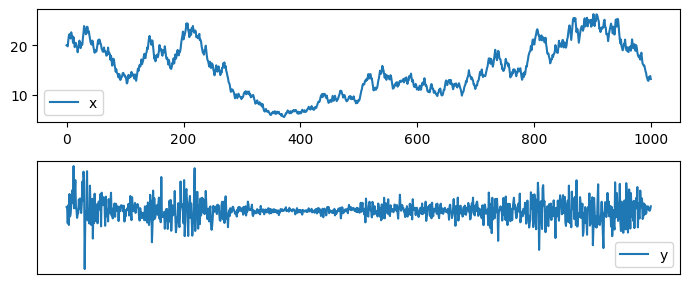

In [37]:
n = 1000
x_arr = [20]
y_arr = [np.random.normal(0, 20**2)]

for i in range(n):
    x_last = x_arr[-1]
    coeff1 = np.random.uniform(0.93, 1.07)
    x = np.random.normal(coeff1*x_last, 0.01)
    x_arr.append(x)
    y = np.random.normal(0, x**2)
    y_arr.append(y)

plt.figure(figsize=(7, 3))
plt.subplot(2, 1, 1)
plt.plot(x_arr, label='x')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_arr, label='y')
plt.legend()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()